In [3]:
%matplotlib inline

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from scipy.stats import ttest_ind, chisquare
import scikitplot as skplt

import pickle

np.random.seed(24680)

ModuleNotFoundError: No module named 'scikitplot'

# The price of a human life
## The second-hand car market - comparing the price of damaged and repaired cars. How saving can cost a human life?
### Author: Nikolay Bratanov

### __Content__

I. Abstract
<br>
II. Introduction
<br>
III. Cars Dataset
<br>
&emsp;1.Data cleaning and manipulation
<br>
&emsp;2.Data Visualization
<br>
&emsp;3.Hypothesis Testing
<br>
&emsp;4.Data Modelation
<br>
&emsp;&emsp;4.1 Simple Linear Regression
<br>
&emsp;&emsp;4.2 Tuned Simple Linear Regression
<br>
&emsp;&emsp;4.3 Polynomial regression
<br>
&emsp;&emsp;4.4 Ridge Regression
<br>
&emsp;&emsp;4.5 Lasso Regression
<br>
&emsp;5.Models Comparison
<br>
&emsp;6.Conclusion
<br>
IV. Airbag Dataset
<br>
&emsp;1.Data Cleaning and Manipulation
<br>
&emsp;2.Data Visualization
<br>
&emsp;3.Hypothesis Testing
<br>
&emsp;&emsp;3.1 Female vs Male
<br>
&emsp;&emsp;3.2 Belted vs not Belted
<br>
&emsp;&emsp;3.3 Airbag vs no Airbag
<br>
&emsp;4.Data modelation
<br>
&emsp;&emsp;4.1 Logistic regression
<br>
&emsp;&emsp;4.2 Decision Tree
<br>
&emsp;&emsp;4.3 Random Forest
<br>
&emsp;&emsp;4.4 AdaBoost Classifier
<br>
&emsp;&emsp;4.5 Gaussian SVM
<br>
&emsp;5.Models Comparison on Test Data
<br>
&emsp;6.Bonus Tuning
<br>
&emsp;7.Conclusion
<br>
V. Conclusion
<br>
VI. Limitations
<br>
V. Implementation Ideas


# I. Abstract

In this work I explored two datasets. The first one consists of car ads in Germany. I explored how the price of a damaged car differs from the price of an undamaged car and I tested this statement usint a hypothesis testing. Then I predicted the exact price difference between a damaged and undamaged car. For this reason I used 5 different linear regression models in order to get a good accuracy.
In the second part of this work I explored a dataset with data showing how important are the airbag and the seatbelt during an accident. Using the data, I trained 6 different models in an attempt to create a model that can predict whether a person died in an accident given certain factors. Unfortunately, all the models performed bad on new data, although some of them performed really good on training data. 

# II. Introduction

The market for used cars in Europe is huge. Countries like Poland, Bulgaria, Romania, Bosnia etc. import intensively second-hand cars from Germany, most of which are damaged. Then they get repaired and resold again to a consumer. However, in order to decrease the cost and increase the profit, many of the dealers resell apply some tricks, for example they return the mileage of the vehicle or dont repair the open airbag.
According to the report of Öko-Institut in Germany (https://www.oeko.de/oekodoc/1114/2011-005-en.pdf) Bulgaria is in top 5 of the countries in Europe with highest import of second hand cars from Western Europe. Furthermore, the most preferable cars are at least 10 years old and with a damage. 
This has very bad consequences of course. According to the Eurostat, Bulgaria "ranks highest in the passenger car category with 64 deaths in road traffic accidents per million inhabitants (2016 data), which is almost six times the lowest rate, that of Malta (11, also 2016 data)"(http://www.bta.bg/en/c/DF/id/2063669). Of course, the car dealers did not cause all these. There is a complex combination of factors (like high corruption, low road control, bad traffic organization, bad road conditions etc), but dead cases could have been fewer if the cars did have working airbags and were new cars without previous accidents.
In this work I want to prove my statements, that damaged cars are much cheaper than undamaged cars and to show the importance of the airbag and the seatbelt during an accident through a visualization. At the end I will try to create a model that can predict correctly whether a person is alive after an accident.


# III. Cars Dataset

## 1. Data Cleaning and Manipulation


First I will read my dataset and will check the content of some of columns. Then I will delete some of them which will be needless for my model.

In [5]:
car_data = pd.read_csv("data/autos.csv", encoding ="ISO-8859-1")

In [6]:
car_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
car_data.offerType.value_counts()

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [8]:
car_data[car_data["offerType"] == "Gesuch"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
16744,2016-04-03 15:48:33,Suche_VW_T5_Multivan,privat,Gesuch,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-04-03 00:00:00,0,29690,2016-04-05 15:16:06
90921,2016-03-27 14:55:45,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,privat,Gesuch,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27 00:00:00,0,50181,2016-04-07 11:45:18
144154,2016-03-14 18:51:39,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,privat,Gesuch,0,test,coupe,2004,manuell,0,3er,150000,1,benzin,bmw,nein,2016-03-14 00:00:00,0,86956,2016-03-25 06:17:06
150400,2016-03-07 21:37:03,Suche_Mercedes_300D__W124__Silberdistel_metall...,privat,Gesuch,0,control,NaN,1985,NaN,109,e_klasse,150000,0,NaN,mercedes_benz,NaN,2016-03-07 00:00:00,0,68169,2016-03-07 21:37:03
164788,2016-03-28 15:56:38,Suche_bitte_hilfe,privat,Gesuch,0,control,NaN,2016,manuell,0,astra,20000,2,diesel,opel,nein,2016-03-28 00:00:00,0,26215,2016-03-28 15:56:38
183716,2016-03-11 10:57:56,Clio_3_Bremsen_vorne_und_hinten_wechseln__EILT!!,privat,Gesuch,0,test,kleinwagen,2005,manuell,0,clio,150000,12,benzin,renault,nein,2016-03-11 00:00:00,0,79423,2016-03-11 23:46:30
251359,2016-03-21 07:55:59,SZUKAM_taniego_TRANSPORTU_auta_do_Polski,privat,Gesuch,150,control,NaN,2000,NaN,0,NaN,5000,1,NaN,sonstige_autos,NaN,2016-03-21 00:00:00,0,50129,2016-03-22 11:45:33
285243,2016-03-15 18:55:15,Trabant_gesucht!!!!,privat,Gesuch,2000,control,NaN,1980,NaN,0,andere,50000,0,NaN,trabant,NaN,2016-03-15 00:00:00,0,1609,2016-03-20 16:16:04
315232,2016-03-28 19:55:44,Ford_Fiesta_2005_mit_Unfallschaden,privat,Gesuch,1550,control,kleinwagen,2005,manuell,90,fiesta,150000,3,diesel,ford,ja,2016-03-28 00:00:00,0,30827,2016-03-28 19:55:44
327204,2016-03-13 07:52:29,Kaufe_Bastlerfahrzeuge_aller_art.,privat,Gesuch,555,test,NaN,2000,manuell,55,NaN,150000,3,NaN,sonstige_autos,ja,2016-03-13 00:00:00,0,34308,2016-03-25 12:48:34


In [9]:
car_data.abtest.value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

In [10]:
car_data.gearbox.value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [11]:
car_data.seller.value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [12]:
car_data.nrOfPictures.unique()

array([0])

I will drop the following columns:

- dateCrawled and dateCreated: As all the ads are for the same year, I will not further explore price drop for the year or any other correlation of the date with the other features. The main reason is that the price of the used cars does not drop soo drastically within one year and I still have the year of the first registration as a feature which will keep the most important information about the age of the car.
- postalCode: Postal code of the region where the car is sold also will not be a subject of my exploration. There might be some difference between Munich and Berlin (for example), but there is no free lunch and for this reason the difference will not be huge.
- lastSeen: This feature will also be excluded from my dataset as it will not bring me any important information for the model.
- offerType: As shown above, many of the searching ads (not selling ads) are with missing values or not realistic. For this reason I will drop the column offerType, because it contains only one lable - "Angebot" = selling ad.
- name: Name of the ad will also not be needed for my exploration. Specific words might catch attention and thus increase the interest, but such marketing tricks might be a subject of another analysis.
- seller: As shown above, only three of the ads are "gewerblich" (business) and all other are "privat" (private). For this reason I will remove this feature too.
- nr_of_pictures: the only value in this column is 0 and for this reason I will drop this column.


In [13]:
car_data = car_data.drop(["dateCrawled", "dateCreated", "postalCode", "lastSeen", "offerType", "name", "seller", "nrOfPictures"], axis =1)

In [14]:
car_data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein


The dataset now looks much bette, but I want to fix some more things:
1. I will rename all the columns following the pythonic way.
2. In the same time I will sort the columns.
3. I will check the shape.
4. I will check the data types.
5. I will check for NaN values.

In [15]:
car_data = car_data[["brand", "model", "vehicleType", "yearOfRegistration", "monthOfRegistration", "kilometer", "fuelType", "powerPS", "gearbox", "notRepairedDamage", "abtest", "price"]]

In [16]:
car_data.columns = ["brand", "model", "vehicle_type", "year_of_registration", "month_of_registration", "kilometer", "fuel_type", "power_ps", "gearbox", "not_repaired_damage", "abtest", "price"]

In [17]:
car_data.head()

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
0,volkswagen,golf,NaN,1993,0,150000,benzin,0,manuell,NaN,test,480
1,audi,NaN,coupe,2011,5,125000,diesel,190,manuell,ja,test,18300
2,jeep,grand,suv,2004,8,125000,diesel,163,automatik,NaN,test,9800
3,volkswagen,golf,kleinwagen,2001,6,150000,benzin,75,manuell,nein,test,1500
4,skoda,fabia,kleinwagen,2008,7,90000,diesel,69,manuell,nein,test,3600


*I leave the brand and the model. This might lead to overfitting my data, but I still want to try and if the data gets overfit I will create another model without these features.

In [18]:
car_data.shape

(371528, 12)

In [19]:
car_data.dtypes

brand                    object
model                    object
vehicle_type             object
year_of_registration      int64
month_of_registration     int64
kilometer                 int64
fuel_type                object
power_ps                  int64
gearbox                  object
not_repaired_damage      object
abtest                   object
price                     int64
dtype: object

In [20]:
car_data.isna().sum()

brand                        0
model                    20484
vehicle_type             37869
year_of_registration         0
month_of_registration        0
kilometer                    0
fuel_type                33386
power_ps                     0
gearbox                  20209
not_repaired_damage      72060
abtest                       0
price                        0
dtype: int64

In [21]:
car_data.isna().sum()/len(car_data)*100

brand                     0.000000
model                     5.513447
vehicle_type             10.192771
year_of_registration      0.000000
month_of_registration     0.000000
kilometer                 0.000000
fuel_type                 8.986133
power_ps                  0.000000
gearbox                   5.439429
not_repaired_damage      19.395577
abtest                    0.000000
price                     0.000000
dtype: float64

Data types are OK, but some of the features (like "gearbox", "not_repaired_damage" and "fuel_type") can be transformed to a boolean. This will be done a bit later.
The bad new is that there are too many NaN that should be handled somehow.

NaN in the feature model can not be filled neither with the mean nor with the median. Filling it manually is also impossible. For this reason I will drop all of them. The same goes for vehicle type. There are many missing values, but in this case this approach is the only way to avoid high bias later.

In [22]:
car_data = car_data.dropna(subset=["model", "vehicle_type"])

In [23]:
car_data.isna().sum()

brand                        0
model                        0
vehicle_type                 0
year_of_registration         0
month_of_registration        0
kilometer                    0
fuel_type                12970
power_ps                     0
gearbox                   8943
not_repaired_damage      46667
abtest                       0
price                        0
dtype: int64

In [24]:
car_data.shape

(320092, 12)

It looks a bit better now, but there are still a lot of missing values especially in the not_repaired_damage column. Unfortunately, replacing is not a good approach, because categorizing a damaged car as not damaged will lead to a high bias. For this reason I will drop all observations with missing values in the columns "not_repaired_damage" and "fuel_type". Then I will check the unique values in the columns "model", "brand", "vehicle_type" and "power_ps".

In [25]:
car_data = car_data.dropna(subset=["fuel_type", "not_repaired_damage"])

In [26]:
car_data.vehicle_type.unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [27]:
car_data.model.unique()

array(['golf', 'fabia', '3er', '2_reihe', 'andere', '3_reihe', 'passat',
       'navara', 'twingo', 'c_max', 'a_klasse', 'scirocco', '5er',
       'arosa', 'civic', 'transporter', 'punto', 'e_klasse', 'one',
       'clio', '1er', 'b_klasse', 'astra', 'fortwo', 'a8', 'jetta',
       'polo', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156',
       'escort', 'forester', 'scenic', 'a1', 'combo', 'focus', 'tt', 'a6',
       'jazz', 'slk', '7er', '80', '147', 'glk', 'meriva', 'z_reihe',
       'v40', 'ibiza', 'mustang', 'eos', 'a4', 'touran', 'getz',
       'insignia', 'a3', 'megane', 'lupo', 'r19', 'colt', 'corsa',
       'vectra', 'berlingo', 'm_klasse', 'tiguan', 'sharan', '6_reihe',
       'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo', '5_reihe',
       'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe', 'mondeo', '6er',
       'fox', 'matiz', 'beetle', 'rio', 'touareg', 'logan', 'omega',
       'cuore', 's_max', 'modus', 'a2', 'x_reihe', 'a5', 'galaxy', 'c3',
       'viano', 's_k

In [28]:
car_data.brand.unique()

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'seat', 'honda', 'fiat',
       'mini', 'opel', 'smart', 'audi', 'alfa_romeo', 'subaru',
       'mitsubishi', 'hyundai', 'volvo', 'lancia', 'porsche', 'citroen',
       'toyota', 'kia', 'chevrolet', 'dacia', 'suzuki', 'daihatsu',
       'chrysler', 'jaguar', 'rover', 'jeep', 'saab', 'daewoo',
       'land_rover', 'trabant', 'lada'], dtype=object)

In [29]:
car_data.power_ps.unique()

array([   75,    69,   102,   109,    50,   105,   140,   190,   136,
         160,   231,   118,   193,    99,    60,   113,     0,   218,
         122,   129,    70,    95,   177,   306,    61,   101,   232,
         156,    80,    82,   204,   155,   150,    87,    86,   131,
         143,   303,   125,   224,   235,   200,   178,   265,   163,
          77,   110,   120,    54,   286,   170,   116,   184,    88,
          64,   305,   197,   179,    90,   250,   313,    41,    45,
          98,   115,   130,   114,   211,    56,   326,   201,   213,
         107,   174,   220,   185,    73,   192,    66,    58,    52,
         510,   147,    71,    97,    65,   239,   295,    68,   203,
         144,   300,   103,    85,   245,   258,   292,   320,    63,
          81,   148,   354,    44,   145,   180,   280,   260,   457,
         104,   409,   333,   117,   141,    55,   132,   165,   234,
         158,    39,   272,    92,   135,   230,    53,   435,    84,
         209,   146,

It looks like there are cars with more than 10000 PS which is impossible so I will first look closer at the cars that seem to have to high PS. The same goes for cars that have PS fewer than 20 (for example).

In [30]:
car_data[car_data["power_ps"]>=1000]

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
1898,toyota,corolla,kleinwagen,2004,6,5000,benzin,1398,manuell,nein,control,3200
2199,opel,vectra,limousine,1999,1,150000,benzin,1799,NaN,ja,control,0
10368,ford,focus,kombi,2003,1,150000,diesel,1753,manuell,ja,test,550
11577,fiat,andere,limousine,1998,8,150000,benzin,10317,manuell,nein,test,0
20022,bmw,5er,kombi,2005,7,150000,diesel,2729,automatik,nein,test,9750
20783,nissan,micra,limousine,2009,3,60000,benzin,1240,manuell,nein,test,3390
21261,citroen,c5,kombi,2003,9,150000,diesel,1900,manuell,ja,test,2000
26429,volkswagen,caddy,bus,2009,6,150000,diesel,10520,manuell,nein,control,10900
34342,chevrolet,andere,bus,1986,12,40000,benzin,1659,automatik,nein,control,9500
35992,ford,escort,kleinwagen,1995,2,150000,benzin,1625,manuell,ja,test,220


133 Observations have more than or equal 1000 PS. However, looking at the brands and the models it looks like this data is not correct. In order to remove those outliears, I will remove them from the dataset. There will still be some observations with incorrect PS power data (in my view), but I will leave them as I can not be sure. I am only sure that cars over 1000 PS cost much more and exist very rarely.

In [31]:
car_data = car_data[car_data["power_ps"]<1000]

In [32]:
mean_power_ps = car_data.power_ps.mean()

In [33]:
car_data[car_data["power_ps"]<30]

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
32,volkswagen,golf,limousine,1994,2,150000,benzin,0,NaN,nein,test,245
55,opel,astra,kombi,1999,8,150000,diesel,0,manuell,ja,test,550
71,volkswagen,polo,kleinwagen,1993,3,150000,benzin,0,manuell,nein,control,800
101,opel,combo,bus,2008,2,150000,diesel,0,manuell,nein,test,4290
163,volkswagen,golf,limousine,1993,9,10000,benzin,0,manuell,ja,control,800
171,volvo,v40,kombi,1998,6,150000,benzin,0,manuell,nein,test,300
203,audi,a3,kombi,2006,11,150000,diesel,0,NaN,nein,control,3200
208,bmw,7er,limousine,1996,5,150000,benzin,0,automatik,nein,test,1600
300,volkswagen,sharan,bus,2000,10,150000,diesel,0,manuell,nein,control,3400
421,peugeot,andere,bus,2000,3,150000,diesel,0,manuell,nein,control,2200


11670 observations with unrealistically low PS. I can not afford to remove all of them so I will replace the unrealisitc PS values with the mean. I got a mean of 123 PS which is a good and representative value.

In [34]:
car_data["power_ps"] = np.where(car_data["power_ps"]<=30, mean_power_ps, car_data["power_ps"])

In [35]:
car_data.power_ps.unique()

array([ 75.        ,  69.        , 102.        , 109.        ,
        50.        , 105.        , 140.        , 190.        ,
       136.        , 160.        , 231.        , 118.        ,
       193.        ,  99.        ,  60.        , 113.        ,
       123.34271851, 218.        , 122.        , 129.        ,
        70.        ,  95.        , 177.        , 306.        ,
        61.        , 101.        , 232.        , 156.        ,
        80.        ,  82.        , 204.        , 155.        ,
       150.        ,  87.        ,  86.        , 131.        ,
       143.        , 303.        , 125.        , 224.        ,
       235.        , 200.        , 178.        , 265.        ,
       163.        ,  77.        , 110.        , 120.        ,
        54.        , 286.        , 170.        , 116.        ,
       184.        ,  88.        ,  64.        , 305.        ,
       197.        , 179.        ,  90.        , 250.        ,
       313.        ,  41.        ,  45.        ,  98.  

In [36]:
car_data.power_ps.mean()

129.0289855310665

Now I want to check for cars that do have overestimated prices.

In [37]:
car_data[car_data.price>500000]

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
1846,bmw,andere,coupe,1980,12,20000,benzin,277.000000,manuell,nein,control,579000
16889,ford,mondeo,kombi,1998,0,150000,benzin,123.342719,NaN,ja,control,1000000
20143,porsche,911,coupe,2016,3,5000,benzin,500.000000,manuell,nein,test,1250000
21467,porsche,911,coupe,1967,10,50000,benzin,215.000000,manuell,nein,control,9999999
26327,porsche,911,coupe,2016,3,5000,benzin,500.000000,manuell,nein,test,600000
45833,porsche,911,coupe,1981,1,150000,benzin,300.000000,manuell,nein,control,1000000
53507,suzuki,andere,suv,1992,0,100000,benzin,69.000000,manuell,nein,test,1000000
54295,mazda,5_reihe,bus,2007,2,150000,diesel,143.000000,manuell,nein,control,10000000
78480,porsche,911,coupe,2016,3,5000,benzin,500.000000,manuell,nein,test,1250000
85047,porsche,911,cabrio,1967,12,5000,benzin,160.000000,manuell,nein,test,911911


There are basically some cars that have overestimated prices so I will remove them completely from the dataset, although not all of the results above are with overestimated price.

In [38]:
car_data = car_data[car_data["price"]<500000]

Now I want to check whether there are any selling ads with too low value for required price. This will also distort real data and will influence my model. We can assume that those cars are being given as a gift, because the Ebay Kleinanzeigen has the option to give away unnecessary subjects (incl. cars). However, my goal here is to create a working model which predicts the car price as accurate as possible and all these values with 0 price will definitely distort the data for my model. On the other side replacing with the mean will overestimate the values, because there will be definitely cars that cost 200 - 1000 euro or are being given away. Thus, I will replace all low values with the half of the mean.

In [39]:
car_data[car_data["price"]<100]

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
7,volkswagen,andere,limousine,1980,7,40000,benzin,50.000000,manuell,nein,test,0
91,mercedes_benz,e_klasse,limousine,1995,4,150000,diesel,113.000000,manuell,nein,control,1
157,opel,meriva,bus,2004,10,150000,lpg,101.000000,manuell,ja,test,0
279,audi,80,limousine,1990,6,70000,benzin,90.000000,manuell,nein,test,1
604,bmw,5er,limousine,1996,0,150000,benzin,170.000000,manuell,nein,test,0
642,volkswagen,polo,limousine,1998,0,150000,benzin,75.000000,manuell,ja,test,0
897,audi,a6,kombi,2009,1,150000,diesel,170.000000,manuell,ja,test,0
985,suzuki,swift,kleinwagen,1997,7,150000,benzin,53.000000,manuell,nein,test,98
992,opel,corsa,kleinwagen,2000,5,150000,benzin,123.342719,manuell,nein,control,0
1011,opel,omega,kombi,1998,0,150000,benzin,136.000000,manuell,nein,test,1


In [40]:
mean_price = car_data.price.mean()/2

In [41]:
car_data["price"] = np.where(car_data["price"]<100, mean_price, car_data["price"])

Now I continue with some exploration of the column "month of registration".

In [42]:
car_data.month_of_registration.unique()

array([ 6,  7, 10,  8, 12,  3,  2,  1,  4,  5,  9, 11,  0])

In [43]:
car_data.month_of_registration.value_counts()

3     28544
6     25219
4     23771
5     23214
7     22045
10    21152
11    19937
9     19543
12    19356
1     18838
8     18198
2     17471
0      7922
Name: month_of_registration, dtype: int64

It seems like month 0 is present in the column "month_of_registration" in 7922 observations. Well, month 0 does not correspond to any month in the real world, so this should be handled as missing value. As month of first registration is not so important for the price I dont want to drop all these observations and thats why I will replace the 0-value with np.nan values first and then will fill them using the ffill method.

In [44]:
car_data.month_of_registration = car_data.month_of_registration.replace(0,np.nan)

In [45]:
car_data.month_of_registration.isna().sum()

7922

In [46]:
car_data["month_of_registration"].fillna(method = "ffill", inplace = True)

In [47]:
car_data.month_of_registration.isna().sum()

0

I will do the same for the column "gearbox", but this time will use the bfill method.

In [48]:
car_data.gearbox.fillna(method="bfill", inplace = True)

In [49]:
car_data.gearbox.isnull().sum()

0

In [50]:
car_data.isna().sum()

brand                    0
model                    0
vehicle_type             0
year_of_registration     0
month_of_registration    0
kilometer                0
fuel_type                0
power_ps                 0
gearbox                  0
not_repaired_damage      0
abtest                   0
price                    0
dtype: int64

In [51]:
car_data.shape

(265210, 12)

After I cleaned the dataset I want to create some graphs in order to check how my data looks like. Without knowing my data I will not be able to test correctly hypothesis and to create a good model.

## 2. Data Visualization

First I will visualise the correlation between the year and the price. I expect that the price will increase if the year increases, so lets see:

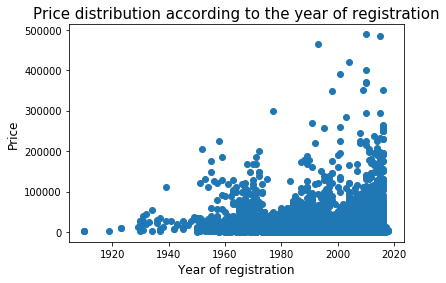

In [52]:
plt.scatter(car_data.year_of_registration, car_data.price)
plt.xlabel("Year of registration", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Price distribution according to the year of registration", fontsize = 15)
plt.show()

Well, as expected, there is a trend and when the year of registration increases, the price also increases, but it is not very clear from this graph, because the data has too large ranges. I will try to narrow the ranges a little bit now:

In [53]:
car_data_narrowed = car_data[car_data["price"]<=100000]

In [54]:
car_data_narrowed = car_data_narrowed[car_data_narrowed["year_of_registration"]>=1990]

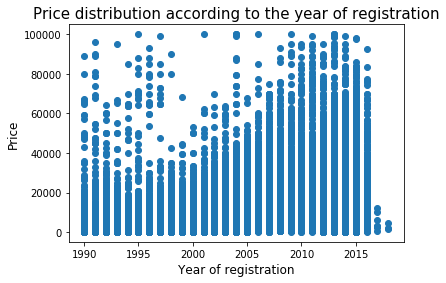

In [55]:
plt.scatter(car_data_narrowed.year_of_registration, car_data_narrowed.price)
plt.xlabel("Year of registration", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Price distribution according to the year of registration", fontsize = 15)
plt.show()

Unfortunately, the graph is not very clear even after narrowing the data ranges. There is still a trend and when the year increases, the bars get more solid, which means that there are more observations there, but there are still cars that are very new and cost 0-10000 euro. Now I will split the dataset into two main groups - damaged cars and not damaged cars.

In [56]:
damaged_cars = car_data[car_data["not_repaired_damage"] == "ja"]
not_damaged_cars = car_data[car_data["not_repaired_damage"] == "nein"]

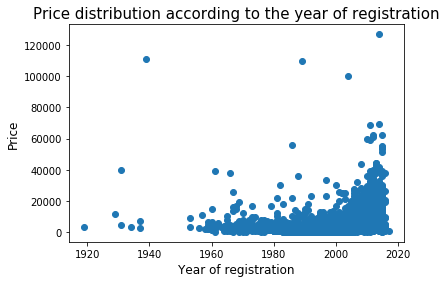

In [57]:
plt.scatter(damaged_cars.year_of_registration, damaged_cars.price)
plt.xlabel("Year of registration", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Price distribution according to the year of registration", fontsize = 15)
plt.show()

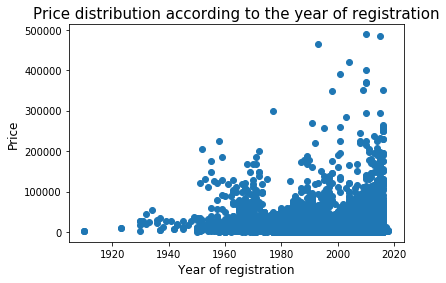

In [58]:
plt.scatter(not_damaged_cars.year_of_registration, not_damaged_cars.price)
plt.xlabel("Year of registration", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Price distribution according to the year of registration", fontsize = 15)
plt.show()

Looks like the distribution is similar, but the price ranges drastically. If the car is damaged the most expensive car cost about 120000 euro. On the other side, if the car is repaired, there are tens of cars valued over 120000 euro. Of course, this should be tested. For this reason I will perform a hypothesis test:

## 3.Hypothesis Testing 

In [59]:
damaged_cars.shape

(28615, 12)

In [60]:
not_damaged_cars.shape

(236595, 12)

In [61]:
damaged_cars_price = damaged_cars.price
not_damaged_cars_price = not_damaged_cars.price

Now I am ready to perform the t-test, but first I will state my hypothesis:

H0: Price is not correlated with the damage and the two samples have the same distribution.

H1: The distribution in the damaged cars dataset differs than the distribution in the not damaged cars dataset.

The threshold value I will use is 1%.

In [62]:
test_result = ttest_ind(damaged_cars_price, not_damaged_cars_price, equal_var = False)
print(test_result.pvalue)

if test_result.pvalue <= 0.05:
    print("There is significant difference in the distribution. Reject H0.")
else:
    print("It can not be proved that the distribution is different. H0 can not be rejected.")

0.0
There is significant difference in the distribution. Reject H0.


As supposed, there is difference in the distribution and the H0 can be rejected categorically.

## 4. Data Modelation

First I want to check the correlations between the different features:

In [63]:
car_data.corr()

,year_of_registration,month_of_registration,kilometer,power_ps,price
year_of_registration,1.000000,-0.000439,-0.392014,0.198557,0.384882
month_of_registration,-0.000439,1.000000,0.009752,0.011007,-0.005895
kilometer,-0.392014,0.009752,1.000000,-0.025371,-0.418544
power_ps,0.198557,0.011007,-0.025371,1.000000,0.546820
price,0.384882,-0.005895,-0.418544,0.546820,1.000000


No surprise, the year of registration and the power of the car increase the price and the amortization (km) decrease it. On the other side, th month seems to have no correlation. However none of the correlations is strong.

In [64]:
car_data.head()

,brand,model,vehicle_type,year_of_registration,month_of_registration,kilometer,fuel_type,power_ps,gearbox,not_repaired_damage,abtest,price
3,volkswagen,golf,kleinwagen,2001,6.0,150000,benzin,75.0,manuell,nein,test,1500.00000
4,skoda,fabia,kleinwagen,2008,7.0,90000,diesel,69.0,manuell,nein,test,3600.00000
5,bmw,3er,limousine,1995,10.0,150000,benzin,102.0,manuell,ja,test,650.00000
6,peugeot,2_reihe,cabrio,2004,8.0,150000,benzin,109.0,manuell,nein,test,2200.00000
7,volkswagen,andere,limousine,1980,7.0,40000,benzin,50.0,manuell,nein,test,3329.51644


1. I will prepare my data and create the features and the target column.
2. I will get dummies for my columns. This model will contain maaaany columns, because I did not exclude the brand and the model columns from the original dataset, but I want to check it though. (I suppose there will be overfitting, but lets see).
3. I will split my data into training and test data using 80% of the data for training and 20% - for testing.
4. Will check whether the split has been done correctly.
5. Will train the model and check the accuracy.


In [65]:
car_data_features = car_data.drop("price", axis = 1)
car_data_labels = car_data.price

In [66]:
car_data_features = pd.get_dummies(car_data_features)

In [67]:
car_data_features.shape

(265210, 314)

In [68]:
car_data_features_train, car_data_features_test, car_data_labels_train, car_data_labels_test = train_test_split(car_data_features, car_data_labels, train_size = 0.8, random_state = 42)

In [69]:
car_data_features_train.shape

(212168, 314)

In [70]:
car_data_labels_train.shape

(212168,)

In [71]:
car_data_features_test.shape

(53042, 314)

In [72]:
car_data_labels_test.shape

(53042,)

### 4.1 Simple Linear Regression


In [73]:
#model_1 = LinearRegression()

In [74]:
#model_1.fit(car_data_features_train, car_data_labels_train)

In [75]:
#with open ("simple_linear_regression", "wb") as f:
    #pickle.dump(model_1, f)

In [76]:
with open ("models/simple_linear_regression", "rb") as f:
    model_1 = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [77]:
model_1_score_test = model_1.score(car_data_features_test, car_data_labels_test)

In [78]:
model_1_score_test

0.61733329334049

In [79]:
model_1_score_train = model_1.score(car_data_features_train, car_data_labels_train)

In [80]:
model_1_score_train

0.6281829808316972

It looks like the model does not overfit the data, but the accuracy is definitely very low. Now I want to create a model using the Polynomial Regression, but I already have 314 columns and this is definitely a bad idea. Thats why I will reshape my data removing the columns "brand" and "model" from the dataset I used in the first model and will perform a simple Linear Regression first and then a Polynomial Regression from 2-nd degree:

In [81]:
car_data = car_data.drop(columns = ["model", "brand"])

### 4.2 Tuned Simple Linear Regression

For the next models I will need dummy variables, so I will first get my dummies, then will split again and will prepare the features and target column.

In [84]:
car_data_features = car_data.drop("price", axis = 1)

In [85]:
car_data_labels = car_data.price

In [86]:
car_data_features = pd.get_dummies(car_data_features)

In [87]:
car_data_features.shape

(265210, 25)

In [88]:
car_data_features_train, car_data_features_test, car_data_labels_train, car_data_labels_test = train_test_split(car_data_features, car_data_labels, train_size = 0.8)

In [89]:
#model_2 = LinearRegression()

In [90]:
#model_2.fit(car_data_features_train, car_data_labels_train)

In [91]:
#with open ("simple_linear_regression_fewer_features", "wb") as f:
    #pickle.dump(model_2, f)

In [92]:
with open ("models/simple_linear_regression_fewer_features", "rb") as f:
    model_2 = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [93]:
model_2_score_test = model_2.score(car_data_features_test, car_data_labels_test)

In [94]:
model_2_score_test

0.5180186795758199

In [95]:
model_2_score_train = model_2.score(car_data_features_train, car_data_labels_train)

In [96]:
model_2_score_train

0.5072828441750286

I got a result that is lower than the score of the model 1 which was expected, because we removed two important features. However, now I will perform a Polynomial regression and I  hope that I can improve the accuracy of the model:

### 4.3 Polynomial regression

In [97]:
poly_model = PolynomialFeatures(degree=2)

In [98]:
poly_car_data_features = poly_model.fit_transform(car_data_features)

In [99]:
poly_car_data_features_train, poly_car_data_features_test, poly_car_data_labels_train, poly_car_data_labels_test = train_test_split(poly_car_data_features, car_data_labels, train_size = 0.8)

In [100]:
#model_3 = LinearRegression()

In [101]:
#model_3.fit(poly_car_data_features_train, poly_car_data_labels_train)

In [102]:
#with open ("polynomial_regression", "wb") as f:
    #pickle.dump(model_3, f)

In [103]:
with open ("models/polynomial_regression", "rb") as f:
    model_3 = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [104]:
model_3_score_test = model_3.score(poly_car_data_features_test, poly_car_data_labels_test)

In [105]:
model_3_score_test

0.6726963427989642

In [106]:
model_3.score(poly_car_data_features_train, poly_car_data_labels_train)

0.6701301318892459

### 4.4 Ridge Regression

As next I will implement the Ridge regression in an attempt to increase my predicting score. Then I will test the model on both training and test data:

In [107]:
#ridge = Ridge()

In [108]:
#ridge.fit(poly_car_data_features_train,poly_car_data_labels_train)

In [109]:
#with open ("ridge_regression", "wb") as f:
    #pickle.dump(ridge, f)

In [110]:
with open ("models/ridge_regression", "rb") as f:
    ridge = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator Ridge from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [111]:
ridge_score_test = ridge.score(poly_car_data_features_test, poly_car_data_labels_test)

In [112]:
ridge_score_test

0.6725294089164999

In [113]:
ridge.score(poly_car_data_features_train, poly_car_data_labels_train)

0.6656644495882897

Well, the score is almost the same as in my Polynomial Regression. The last model I want to try out is the Lasso Regression:

### 4.5 Lasso Regression 

In [114]:
#lasso = Lasso()

In [115]:
#lasso.fit(poly_car_data_features_train,poly_car_data_labels_train)

In [116]:
#with open ("lasso_regression", "wb") as f:
    #pickle.dump(lasso, f)

In [117]:
with open ("models/lasso_regression", "rb") as f:
    lasso = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator Lasso from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [118]:
lasso_score_test = lasso.score(poly_car_data_features_test, poly_car_data_labels_test)

In [119]:
lasso_score_test

0.6210944092044767

In [120]:
lasso.score(poly_car_data_features_train, poly_car_data_labels_train)

0.6105471635137065

## 5. Models Comparison

In [121]:
print("Accuracy score:")
print("Simple Linear Regression:", model_1_score_test)
print("Tuned Simple Linear Regression:", model_2_score_test)
print("Polynomial Regression:", model_3_score_test)
print("Ridge Regression:", ridge_score_test)
print("Lasso Regression:", lasso_score_test)

Accuracy score:
Simple Linear Regression: 0.61733329334049
Tuned Simple Linear Regression: 0.5180186795758199
Polynomial Regression: 0.6726963427989642
Ridge Regression: 0.6725294089164999
Lasso Regression: 0.6210944092044767


Definitely the Ridge Regression and the Polynomial Regression ar emy best performing models. Anyway, there are some reasons for that:
- there are only 209 K observations for training. Imagine how many different car models there are. Some of them are much more luxurious. Thus even if an observation has the same paramteres..if it is Audi will be much more expensive than if it is Honda (for example).
- there are many oltimers and these cars are very old, but cost tons of money and they are even more expensive than the a brand new luxurious car.

These outliars definitely influence the model significantly and increase the bias. What I am interested here is to check the difference of the price if a car is damaged and if it is not. In this case I will use the third model (tuned polynomial regression):

In [122]:
rep_car = [[2010, 6, 100000, 100, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2016, 6, 10000, 250, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2002, 6, 150000, 90, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]]

In [123]:
not_rep_car = [[2010, 6, 100000, 100, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
              [2016, 6, 10000, 250, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
              [2002, 6, 150000, 90, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]]

In [124]:
rep_car_poly = poly_model.fit_transform(rep_car)

In [125]:
not_rep_car_poly = poly_model.fit_transform(not_rep_car)

In [126]:
print("Prices of not damaged vehicles:")
model_3.predict(rep_car_poly)

Prices of not damaged vehicles:


array([ 8816.98978059, 42516.92995609,  1288.42387269])

In [127]:
print("Prices of damaged vehicles:")
model_3.predict(not_rep_car_poly)

Prices of damaged vehicles:


array([ 6949.3499216 , 34626.72831741,   767.47508942])

## 6. Conclusion

Logically, damaged cars are cheaper, depending on the damage it might be up to 1.5-2 times cheaper than a not damaged car. Those cars are gold for car dealers in Eastern Europe where the standard of life is much lower than in Western Europe. Car dealers buy damaged cars mainly from Germany, repair them in their country and then resell then with profit. This works well, but very often they "reduce the amortization" of the vehicle as they return the mileage so that the car is more attractive. Furthermore, damaged cars have their airbags open already and there is no guarantee that the airbag will work again if the car has another accident. This can cost a human life, but I will explore furhter how important are the airbags during an accident thanks to the data in the upcoming dataset.

# IV. Airbag Dataset


In [128]:
airbag_data = pd.read_csv("data/Kag_Airbag.csv")

In [129]:
airbag_data.head()

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


A drawback of this dataset is that it consists of only 26000 observations. Anyway, I will try to create a good model that can predict whether a person is alive or dead after the accident.

Description of the features:

- dvcat - ordered factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
- weight - Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities.
- dead - factor with levels alive dead
- airbag - a factor with levels none airbag
- seatbelt - a factor with levels none belted
- frontal - a numeric vector; 0 = non-frontal, 1=frontal impact
- sex - a factor with levels f m
- ageOFocc - age of occupant in years
- yearacc - year of accident
- yearVeh - Year of model of vehicle; a numeric vector
- abcat - Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy nodeploy unavail
- occRole - a factor with levels driver pass
- deploy - a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
- injSeverity - a numeric vector; 0:none, 1:possible injury, 2:no incapacity, 3:incapacity, 4:killed; 5:unknown, 6:prior death
- caseid - character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.

## 1. Data Cleaning and Manipulation

In order to clean the dataset, I will perform the following operations:
1. I will remove the features that wont be used in this research - caseid, Unnamed:0, dvcat, yearacc and weight, because it is either not clear how they are measured  / what they mean or they will not contribute to building a better performing model.
2. I will check the dtypes
3. I will rename the features
4. I will replace the values in my target column so that the 1 represent the rare case.

In [130]:
airbag_data = airbag_data.drop(["caseid", "Unnamed: 0", "weight", "yearacc", "injSeverity", "deploy"], axis=1)

In [131]:
airbag_data.head()

,dvcat,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearVeh,abcat,occRole
0,25-39,alive,none,belted,1,f,26,1990.0,unavail,driver
1,10-24,alive,airbag,belted,1,f,72,1995.0,deploy,driver
2,10-24,alive,none,none,1,f,69,1988.0,unavail,driver
3,25-39,alive,airbag,belted,1,f,53,1995.0,deploy,driver
4,25-39,alive,none,belted,1,f,32,1988.0,unavail,driver


In [132]:
airbag_data.dtypes

dvcat        object
dead         object
airbag       object
seatbelt     object
frontal       int64
sex          object
ageOFocc      int64
yearVeh     float64
abcat        object
occRole      object
dtype: object

In [133]:
airbag_data.columns = ["speed_impact", "y", "is_airbag", "is_seatbelt", "is_frontal", "sex", "age", "vehicle_year", "airbag_deploy", "role"]

In [134]:
airbag_data = airbag_data[["role", "age", "sex", "vehicle_year", "is_frontal", "speed_impact", "is_seatbelt", "is_airbag", "airbag_deploy", "y"]]

In [135]:
airbag_data.y = airbag_data.y.replace({"alive":0, "dead":1})

In [136]:
airbag_data.head()

,role,age,sex,vehicle_year,is_frontal,speed_impact,is_seatbelt,is_airbag,airbag_deploy,y
0,driver,26,f,1990.0,1,25-39,belted,none,unavail,0
1,driver,72,f,1995.0,1,10-24,belted,airbag,deploy,0
2,driver,69,f,1988.0,1,10-24,none,none,unavail,0
3,driver,53,f,1995.0,1,25-39,belted,airbag,deploy,0
4,driver,32,f,1988.0,1,25-39,belted,none,unavail,0


Ok, now my dataset is sorted, clean and ready for the check whether there are NaN values:

In [137]:
airbag_data.isna().sum()

role             0
age              0
sex              0
vehicle_year     1
is_frontal       0
speed_impact     0
is_seatbelt      0
is_airbag        0
airbag_deploy    0
y                0
dtype: int64

Perfect, I will remove this one missing value. It will not have any influence on my models later. After that I will create some charts in order to visualize the data.

In [138]:
airbag_data = airbag_data.dropna()

In [139]:
airbag_data.shape

(26216, 10)

## 2. Data Visualization

First, I will visualize my target column to see whether a stratification will be needed:

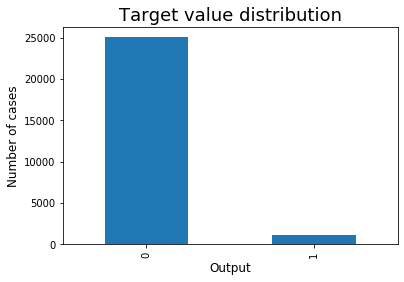

In [140]:
airbag_data.y.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Target value distribution", fontsize = 18)
plt.show()

In [141]:
airbag_data.y.value_counts()/len(airbag_data)*100

0    95.498932
1     4.501068
Name: y, dtype: float64

It can be clearly seen that the output data is very imbalanced. Approximately 95.5% of the outputs are 0 (which means that the people are alive after the accident). This means that my model will have accuracy of 95.5% if it only predicts 0. I will consider this a bit later when I train my models.

I will use the same approach to visualize the distribution of the categories in the other features and to see whether there is something interesting there:

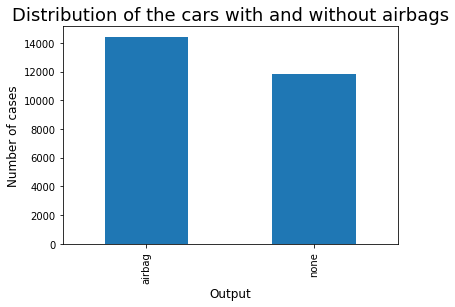

In [142]:
airbag_data.is_airbag.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Distribution of the cars with and without airbags", fontsize = 18)
plt.show()

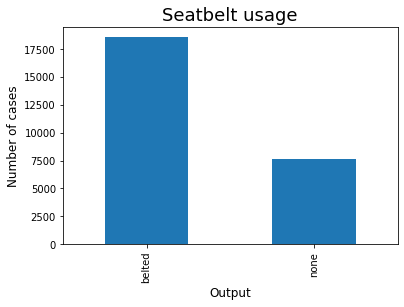

In [143]:
airbag_data.is_seatbelt.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Seatbelt usage", fontsize = 18)
plt.show()

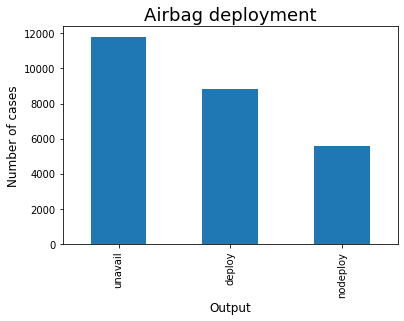

In [144]:
airbag_data.airbag_deploy.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Airbag deployment", fontsize = 18)
plt.show()

In [145]:
airbag_data.airbag_deploy.value_counts()

unavail     11798
deploy       8835
nodeploy     5583
Name: airbag_deploy, dtype: int64

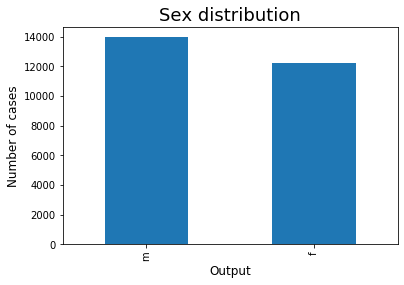

In [146]:
airbag_data.sex.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Sex distribution", fontsize = 18)
plt.show()

Looking at the charts, I can make 4 important suggestions:
1. Almost 50% of the vehicles back then do not have an airbag at all.
2. Approximately 2/3 of the people use seatbelt while driving.
3. Even if the vehicle does have an airbag, there is about 40% probability that it will not open during an accident. Of course, this depends also on the accident severity.
4. The dataset is very sex-balanced and there are almost that many female drivers as male drivers.

Now I want to split the dataset into two parts - one consisting all the positive cases and another all the negative. Then I will look closer again what was the performance of the airbag in both groups. I expect that in the positive cases dataset, most of the vehicles did not have airbags or they did not deploy and this led to a death of a passanger. I dont expect any differences in the distribution when comparing the sex factor.

In [147]:
positive_cases = airbag_data[airbag_data["y"] == 1]
negative_cases = airbag_data[airbag_data["y"] == 0]

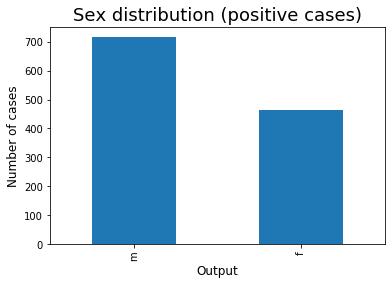

In [148]:
positive_cases.sex.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Sex distribution (positive cases)", fontsize = 18)
plt.show()

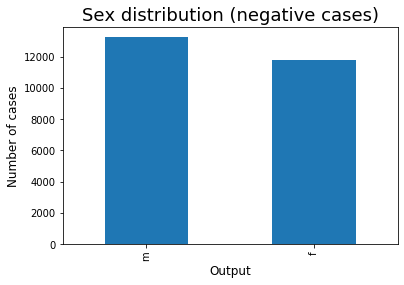

In [149]:
negative_cases.sex.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Sex distribution (negative cases)", fontsize = 18)
plt.show()

No significant difference in the distribution, but if comparing percentages, it looks like men die more often in an accident.

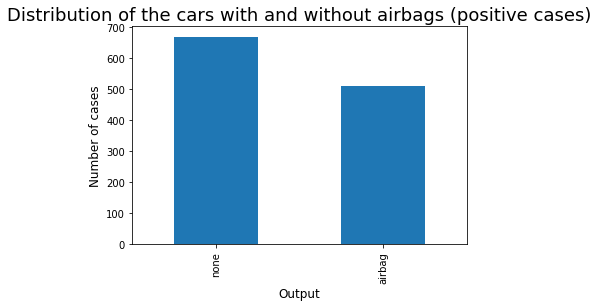

In [150]:
positive_cases.is_airbag.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Distribution of the cars with and without airbags (positive cases)", fontsize = 18)
plt.show()

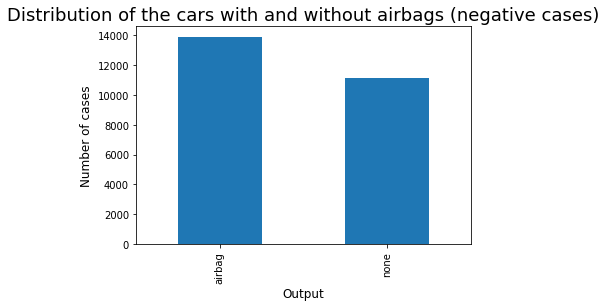

In [151]:
negative_cases.is_airbag.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Distribution of the cars with and without airbags (negative cases)", fontsize = 18)
plt.show()

Yes, as predicted, most of the dead cases were people who drove a car without airbag. Now I will check whether the same goes for the seatbelt:

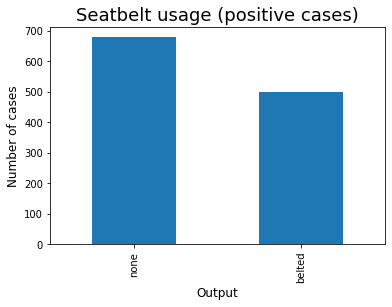

In [152]:
positive_cases.is_seatbelt.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Seatbelt usage (positive cases)", fontsize = 18)
plt.show()

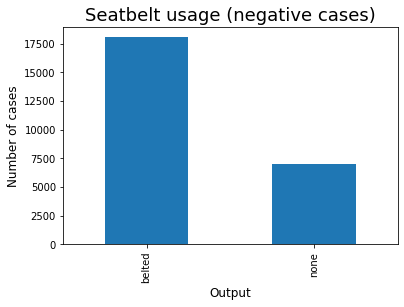

In [153]:
negative_cases.is_seatbelt.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Seatbelt usage (negative cases)", fontsize = 18)
plt.show()

And yes, most of the dead cases were not using a seatbelt during the accident. The last thing I will visualise before I test a hypothesis is the deployment distribution in both groups:

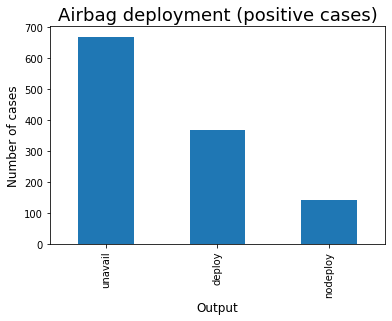

In [154]:
positive_cases.airbag_deploy.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Airbag deployment (positive cases)", fontsize = 18)
plt.show()

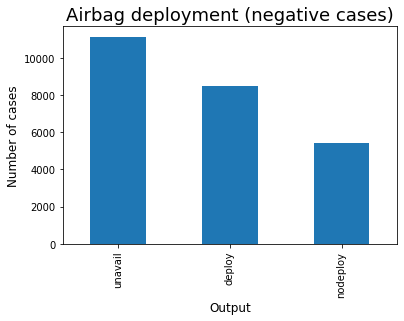

In [155]:
negative_cases.airbag_deploy.value_counts().plot.bar()
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Output", fontsize = 12)
plt.title("Airbag deployment (negative cases)", fontsize = 18)
plt.show()

It seems that there is no significant difference in the distribution.

Now, when I know something more about the distribution of the data, I can start preparing the data for modelation and then I will train some models and compare them.

## 3. Hypothesis Testing 

__Unfortunately, the dataset is way too small in order to make better chisqured tests.

### 3.1 Female vs Male 

First I will test the independence of the sex factor. Here are my hypothesis:

H0: Male and Female variables are independent.

H1: Male and Female variables are dependent.

First I will prepare my data and then I will use the Chisquare Test. The level of significance I will use is 0.01:

In [156]:
positive_cases_sex = positive_cases.sex.value_counts()
negative_cases_sex = negative_cases.sex.value_counts()

In [157]:
chisquare(positive_cases_sex, f_exp = negative_cases_sex)

Power_divergenceResult(statistic=22732.955376472655, pvalue=0.0)

Well, the pvalue is less than the significance level, so I can reject the H0, stating that the male and female variable in my dataset are not independent.

### 3.2 Belted vs not Belted 

The next hypothesis test I will test is the indepenence of the seatbelt factor:

H0: Belted and not Belted variables are independent.

H1: Belted and not Belted variables are dependent.

I will again prepare my data and then I will use the Chisquare Test with level of significance 0.01:

In [158]:
positive_cases_belted = positive_cases.is_seatbelt.value_counts()
negative_cases_belted = negative_cases.is_seatbelt.value_counts()

In [159]:
chisquare(positive_cases_belted, f_exp = negative_cases_belted)

Power_divergenceResult(statistic=22737.485451391192, pvalue=0.0)

Same story, H0 can be rejected which means that there is dependence between the variables.

### 3.3 Airbag vs no Airbag 

The last hypothesis test I will test is the indepenence of the airbag factor:

H0: Airbag vs no Airbag variables are independent.

H1: Airbag vs no Airbag variables are dependent.

I will again prepare my data and then I will use the Chisquare Test with level of significance 0.01:

In [160]:
positive_cases_airbag = positive_cases.is_airbag.value_counts()
negative_cases_airbag = negative_cases.is_airbag.value_counts()

In [161]:
positive_cases_airbag

none      669
airbag    511
Name: is_airbag, dtype: int64

In [162]:
negative_cases_airbag

airbag    13907
none      11129
Name: is_airbag, dtype: int64

In [163]:
chisquare([669, 511], f_exp = [11129,13907])

Power_divergenceResult(statistic=22734.991970453277, pvalue=0.0)

And again, the H0 can be rejected. This means that the airbag variable is not independent.

## 4. Data modelation

First, I will check the correlation between the different features:

In [164]:
airbag_data.corr()

,age,vehicle_year,is_frontal,y
age,1.000000,0.016451,-0.044237,0.089809
vehicle_year,0.016451,1.000000,-0.028896,-0.052435
is_frontal,-0.044237,-0.028896,1.000000,-0.068022
y,0.089809,-0.052435,-0.068022,1.000000


Looks like there is no single correlation, even a light one.

Now I will make all the features to be categorical (boolean) and then I will create my features variable and my target variable:

In [165]:
airbag_data = pd.get_dummies(airbag_data)

In [166]:
airbag_data_features = airbag_data.drop("y", axis = 1)
airbag_data_target = airbag_data.y

Now I will need to scale my data, because most of the features have values 0 and 1 only, but some of them (like the age or the year of the vehicle) have values that are much higher. For this reason, I will perform the normalization of the data using the MinMaxScaler:

In [167]:
scaler = MinMaxScaler()

In [168]:
airbag_data_features = scaler.fit_transform(airbag_data_features)

Now it is time to split the dataset into train and test data. I will use the standard split - 70/30%. When splitting I will stratify the data, because it is highly imbalanced (as I have already shown a bit earlier). Then I will check the shapes of the 4 new variables so that I am sure I did not make any mistake.

In [169]:
airbag_data_features_train, airbag_data_features_test, airbag_data_target_train, airbag_data_target_test = train_test_split(airbag_data_features, airbag_data_target, train_size = 0.7,random_state = 42, stratify = airbag_data_target)

In [170]:
airbag_data_features_train.shape

(18351, 19)

In [171]:
airbag_data_target_train.shape

(18351,)

In [172]:
airbag_data_features_test.shape

(7865, 19)

In [173]:
airbag_data_target_test.shape

(7865,)

The last thing I will do before I start training different models is to prepare a Kfold split parameter, which will be used later in the model training part. I will set the splits to be 10 so that the testing fold consist of approximately 1800 observations. This should be a good starting point.

In [174]:
k_fold = StratifiedKFold(n_splits=10)

### 4.1 Logistic regression

The data is prepared for modelation. The first method I will use for this classification problem will be the logistic regression. I will give some values for the parameter C and using the Grid search I will optimize my model. I will not use the accuracy score to evaluate it though, because I already showed that it will be almost 96% even if the model always predicts 0 as output. 

In [175]:
#parameters = {"C": [0.01, 0.1, 1, 10, 100], 
#              "max_iter": [50, 100, 300], 
#              "fit_intercept": [True, False]}

#grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [176]:
#grid_search.best_estimator_

After the first attempt I can see that C = 10000 (the highest one), max_iter = 50 (the lowest one) and fit_intercept is set to True. This means that I can make another attempt using higher values for C and lower values for max_iter. Now I will try again with different parameters:

In [185]:
#parameters = {"C": [1, 2, 5, 10, 20], 
#              "max_iter": [2, 5, 10, 20], 
#              "fit_intercept": [True, False]}

#grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [187]:
#grid_search.best_estimator_

Finally, I found the paraemters that optimize my model. Now I will save this model to a variable so that I can compare it on a lter stage. Then I will evaluate my model using the f1 score.

In [360]:
#logistic_regr = grid_search.best_estimator_

In [361]:
#with open ("logistic_regression", "wb") as f:
#    pickle.dump(logistic_regr, f)

In [177]:
with open ("models/logistic_regression", "rb") as f:
    logistic_regr = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [178]:
predictions = logistic_regr.predict(airbag_data_features_train)

In [179]:
print(classification_report(airbag_data_target_train, predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17525
           1       0.48      0.09      0.15       826

    accuracy                           0.95     18351
   macro avg       0.72      0.54      0.56     18351
weighted avg       0.94      0.95      0.94     18351



Terrible performance of the model. If I use accuracy to evaluate my model I would get a very high score, but in fact my model does not perform well. The reason might be not enough features, not enough data etc. Now I want to test another algorithm on the same data.

### 4.2 Decision Tree

In [194]:
#parameters = {"max_depth": [10, 15, 20, 25, 30], 
#              "min_samples_leaf": [1, 3, 5, 7], 
#              "max_leaf_nodes": [325, 350, 375, 400, 450]}

#grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [195]:
#grid_search.best_estimator_

In [191]:
#decision_tree = grid_search.best_estimator_

Decision tree algorithm performs slightly better than the logistic regression. After many attempts, I found the optimal paramteres and the f1 score is almost 0.18. Now I will call again the classification report to look closer:

In [196]:
#with open ("decision_tree", "wb") as f:
#    pickle.dump(decision_tree, f)

In [180]:
with open ("models/decision_tree", "rb") as f:
    decision_tree = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [181]:
predictions = decision_tree.predict(airbag_data_features_train)

In [182]:
print(classification_report(airbag_data_target_train, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17525
           1       0.92      0.48      0.63       826

    accuracy                           0.97     18351
   macro avg       0.95      0.74      0.81     18351
weighted avg       0.97      0.97      0.97     18351



Obviously, the weak point is again the recall of the class 1. It is much better than the logistic regression, but it is still too low. For this reason I  want to continue with another algorithm - the Random Forest. I will manipulate only 2 parameters - the n_estimators (the number of the trees in my frest) and the max_depth (the depth of the trees). I want to create many weak learners and combine them in one strong learner. I believe this will help me create an appropriate model for this data.

### 4.3 Random Forest 

In [183]:
#parameters = {"n_estimators": [25, 35, 50, 75, 100], 
#              "max_depth": [10, 15, 20, 25, 30, 35]}

#grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [212]:
#grid_search.best_estimator_

Perfect, looks like I found the optimal paramters for my model - max_depth = 20 and n_estimators = 15. Now I will save the model in a variable and will show the score, will visualise the classification report for a closer look:

In [213]:
#random_forest = grid_search.best_estimator_

In [214]:
#with open ("random_forest", "wb") as f:
#    pickle.dump(random_forest, f)

In [184]:
with open ("models/random_forest", "rb") as f:
    random_forest = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [185]:
predictions = random_forest.predict(airbag_data_features_train)

In [186]:
print(classification_report(airbag_data_target_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17525
           1       0.98      0.90      0.93       826

    accuracy                           0.99     18351
   macro avg       0.99      0.95      0.97     18351
weighted avg       0.99      0.99      0.99     18351



As supposed, the random forest performs even better than the decision tree, but I still need a better recall rate, so I will try to obtain it thanks to a boosting algorithm - the AdaBoost

### 4.4 AdaBoost Classifier

The next algorithm I want to implement is the AdaBoost algorithm, which is very good performer when there is a classification problem. I will manipulate only 2 of the parameters here - the n_estimators and the learning_rate.

In [251]:
#parameters = {"n_estimators": [1, 3, 5, 10, 15, 20, 35, 50, 60, 75, 100], 
#              "learning_rate": [0.01, 0.015, 0.02, 0.04, 0.05, 0.06, 0.075]}
#tree = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator = AdaBoostClassifier(tree), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [252]:
#grid_search.best_estimator_

In [253]:
#ada_boost = grid_search.best_estimator_

In [254]:
#with open ("ada_boost", "wb") as f:
#    pickle.dump(ada_boost, f)

In [187]:
with open ("models/ada_boost", "rb") as f:
    ada_boost = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [188]:
predictions = ada_boost.predict(airbag_data_features_train)

In [189]:
print(classification_report(airbag_data_target_train, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17525
           1       1.00      0.89      0.94       826

    accuracy                           0.99     18351
   macro avg       1.00      0.94      0.97     18351
weighted avg       1.00      0.99      0.99     18351



After multiple trainings, I finally got kind of optimal parameters for the model. I already provided all the paramters I tried out till I reach the best combination. All the tested parameters are in the commented code above:
"n_estimators": [1, 3, 5, 10, 15, 20, 35, 50, 60, 75, 100], "learning_rate": [0.01, 0.015, 0.02, 0.04, 0.05, 0.06, 0.075]

### 4.5 Gaussian SVM

The last algorithm I will use in order to search for even better algorithm is the gaussian SVM, where I will manipulate two of the parameters - the C and the gamma.

In [275]:
#parameters = {"C": [10, 15, 20, 50, 75, 100, 125, 150, 175, 200], 
#              "gamma": [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 10, 25, 30, 35, 40, 50, 75, 100]}

#grid_search = GridSearchCV(estimator = SVC(kernel="rbf"), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(airbag_data_features_train, airbag_data_target_train)

In [276]:
#grid_search.best_estimator_

In [277]:
#gaussian_svm = grid_search.best_estimator_

Many optimization were needed and I tried many valies for each of the parameters in order to optimize my model. The values I tried are:"C": [10, 15, 20, 50, 75, 100, 125, 150, 175, 200], "gamma": [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 10, 25, 30, 35, 40, 50, 75, 100]

In [268]:
#with open ("gaussian_svm", "wb") as f:
#    pickle.dump(gaussian_svm, f)

In [190]:
with open ("models/gaussian_svm", "rb") as f:
    gaussian_svm = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator SVC from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [191]:
predictions = gaussian_svm.predict(airbag_data_features_train)

In [192]:
print(classification_report(airbag_data_target_train, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17525
           1       0.93      0.48      0.63       826

    accuracy                           0.97     18351
   macro avg       0.95      0.74      0.81     18351
weighted avg       0.97      0.97      0.97     18351



Pretty low recall rate. Anyway, I already have two very good performing models - the Random forest and the AdaBoost. Now I want to test my model on the test data and check whether some of them did not overfit the training data.

## 5. Models Comparison on Test Data 

In [193]:
logistic_regr_predictions = logistic_regr.predict(airbag_data_features_test)
decision_tree_predictions = decision_tree.predict(airbag_data_features_test)
random_forest_predictions = random_forest.predict(airbag_data_features_test)
ada_boost_predictions = ada_boost.predict(airbag_data_features_test)
gaussian_svm_predictions = gaussian_svm.predict(airbag_data_features_test)

logistic_regr_score = f1_score(logistic_regr_predictions, airbag_data_target_test)
decision_tree_score = f1_score(decision_tree_predictions, airbag_data_target_test)
random_score_score = f1_score(random_forest_predictions, airbag_data_target_test)
ada_boost_score = f1_score(ada_boost_predictions, airbag_data_target_test)
gaussian_svm_score = f1_score(gaussian_svm_predictions, airbag_data_target_test)

In [194]:
print("Testing f1-scores:")
print("Logistic regression:", logistic_regr_score)
print("Decision tree:", decision_tree_score)
print("Random forest:", random_score_score)
print("AdaBoost:", ada_boost_score)
print("Gaussian SVM:", gaussian_svm_score)

Testing f1-scores:
Logistic regression: 0.17577197149643706
Decision tree: 0.20577617328519854
Random forest: 0.1798165137614679
AdaBoost: 0.19793205317577547
Gaussian SVM: 0.17073170731707318


Well, all of the models show pretty low f1 score on the test data which means that the models are not reliable. Some of them showed very high scores on the training data (they overfit the training data), but on the testing data all the models show very low f1 score. The reason for this might be that there are not enough observations to train a good model, not enough features etc. One thing that I can do is to apply PolynomialFeatures in order to get more features and thus create a new model. And I will do this a bit later. First, I want to take the top performer - the AdaBoost and analyze the result.

In [195]:
print(classification_report(airbag_data_target_test, ada_boost_predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7511
           1       0.21      0.19      0.20       354

    accuracy                           0.93      7865
   macro avg       0.58      0.58      0.58      7865
weighted avg       0.93      0.93      0.93      7865



In [196]:
confusion_matrix(airbag_data_target_test, ada_boost_predictions)

array([[7255,  256],
       [ 287,   67]])

As supposed, my model can not predict the 1 as output. It performs excellent when predicting 0-s, but in my case it is important to predict the 1-s (people who died).

Before tuning my best performing model I will visualise the Roc curve of the AdaBoost model:

In [197]:
y_true = airbag_data_target_test
y_probas = ada_boost.predict_proba(airbag_data_features_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

NameError: name 'skplt' is not defined

We can see the the Roc score for both classes is 0.71. The micro-average Roc curve shows very good score, but as the data is imbalanced, this should not be taken as an appropriate measure.

## 6. Bonus Tuning 

After the analysis of the best performing model, I want to try once again to improve its performance even more. For this reason I will create a polynomial features set which will be used for training and I hope that increasing the features (I will use 2-nd degree only in this work) will increase also the performance of my model. I will use only one training algorithm - the best performer so far, the AdaBoost.

In [198]:
poly_model = PolynomialFeatures(degree=2)

In [199]:
poly_airbag_data_features = poly_model.fit_transform(airbag_data_features)

In [200]:
poly_airbag_data_features_train, poly_airbag_data_features_test, poly_airbag_data_labels_train, poly_airbag_data_labels_test = train_test_split(poly_airbag_data_features, airbag_data_target, stratify = airbag_data_target, train_size = 0.7)

In [201]:
#parameters = {"n_estimators": [2, 4, 5, 10, 15, 20, 35, 50], 
#              "learning_rate": [0.02, 0.035, 0.05, 0.075, 0.1]}
#tree = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator = AdaBoostClassifier(tree), param_grid = parameters, scoring = make_scorer(f1_score), cv = k_fold)
#grid_search.fit(poly_airbag_data_features_train, poly_airbag_data_labels_train)

In [202]:
#grid_search.best_estimator_

In [334]:
#ada_boost_tuned = grid_search.best_estimator_

In [335]:
#with open ("ada_boost_tuned", "wb") as f:
#    pickle.dump(ada_boost_tuned, f)

In [203]:
with open ("models/ada_boost_tuned", "rb") as f:
    ada_boost_tuned = pickle.load(f)

/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/nikolay/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.20.3 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


After I optimized the model, I will first show the classification report using the training data and then will use the test data in order to check how my model handles new data and how good it is in predicting it.

In [204]:
predictions = ada_boost_tuned.predict(poly_airbag_data_features_train)

In [205]:
print(classification_report(poly_airbag_data_labels_train, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17525
           1       0.77      0.65      0.71       826

    accuracy                           0.98     18351
   macro avg       0.88      0.82      0.85     18351
weighted avg       0.97      0.98      0.97     18351



In [206]:
ada_boost_tuned_predictions = ada_boost_tuned.predict(poly_airbag_data_features_test)

In [207]:
ada_boost_tuned_score = f1_score(poly_airbag_data_labels_test, ada_boost_tuned_predictions)

In [208]:
print("AdaBoost score: ", ada_boost_tuned_score)

AdaBoost score:  0.7270072992700729


In [209]:
print(classification_report(poly_airbag_data_labels_test, ada_boost_tuned_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7511
           1       0.75      0.70      0.73       354

    accuracy                           0.98      7865
   macro avg       0.87      0.85      0.86      7865
weighted avg       0.98      0.98      0.98      7865



In fact, using the polynomial features did not improve the model performance, it is even a bit worse.

## 7. Conclusion 

After this deep exploration of the dataset, after creating so many models, after all these optimizations, I still dont have a good performing model on new (unknown) data and my model has difficulties to predict correctly new data. Some of them, though, showed great performance on the training data. In this case, the dataset has too few features and the features that were explored were not so cruicial for the outcome (wheter a person died in the accident or not). In order to create a model that works much better and correctly predicts the output, there is a need of data collection with more complex features. For example, the speed before the accident, the area where the accident happened and the speed limit there, the type of the vehicle etc.

# V. Conclusion

To sum up, damaged cars are very popular for car dealers especially in Eastern Europe. People buy damaged cars from Germany, UK and other countries in Wester Europe, repair them in Eastern Europe and resell them with profit. However, most of the cars are with damaged airbags and the repair costs for this are very high. For this reason, many cars are being resold with unrepaired airbags or without airbags at all. As seen, airbags and seatbelts are very important especially during an accident. People who use seatbelt and have airbags in the cars have much better chance to stay alive after the accident even with injury.
Saving a few thousands euro when buying a car is a great deal, but does a life cost a few thousand euro? I leave this question here without answer, but you better think about it before making a "great deal" and buy the "perfect" car in Bulgaria.

# VI. Limitations

This project explored data that was very imbalanced. I did not manipulate the data itself. I tried to handle the data with different methods. Furhter ideas to create better models might be using oversampling of the positive cases. Another method I did not use is the dimensionalty reduction. The reason for that is the few important features I have in both datasets. If I use the PCA method it might cut another feature or 2, but this will not improve the performance of my models significantly or will not speed up the training significantly.

Another data limitations: The Airbag dataset does not consist of data sampled in Eastern Europe; The Car dataset consist of cars that have not been sold on the price which is in the dataset and this means that the price might differ in some cases.

# VII. Implementation Ideas